# Importation des librairies nécessaires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Création des dataframes

In [2]:
df_heart = pd.read_csv("Datasets\heart.csv")

df_o2Saturation = pd.read_csv("Datasets\o2Saturation.csv")


df_heart_age = df_heart["age"]
df_heart_sex = df_heart["sex"]
df_heart_cp = df_heart["cp"]
df_heart_trtbps = df_heart["trtbps"]
df_heart_chol = df_heart["chol"]
df_heart_fbs = df_heart["fbs"]
df_heart_restecg = df_heart["restecg"]
df_heart_thalachh = df_heart["thalachh"]
df_heart_exng = df_heart["exng"]
df_heart_oldpeak = df_heart["oldpeak"]
df_heart_slp = df_heart["slp"]
df_heart_caa = df_heart["caa"]
df_heart_thall = df_heart["thall"]
df_heart_output = df_heart["output"]





# Compréhension des données


In [3]:
df_heart.head(4000)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df_heart.describe()
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df_heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

# Regarder si valeur manquante 


In [6]:
df_heart.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Regarder si valeur en double


In [7]:
df_heart.duplicated().sum()

1

In [8]:
df_heart.drop_duplicates(inplace=True)

# Observation graphique des données

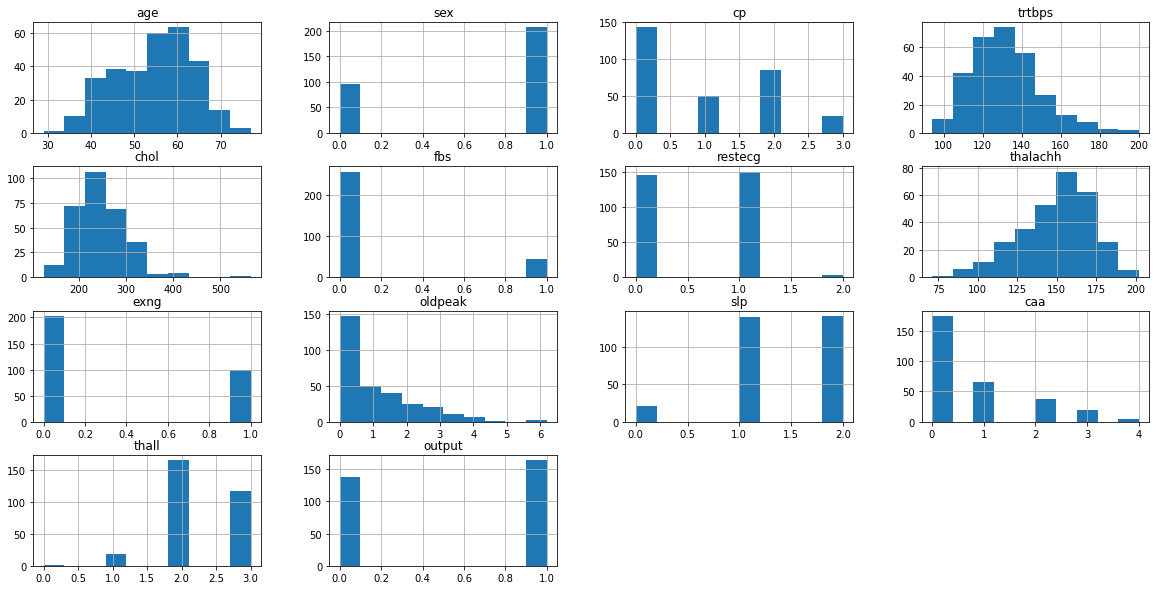

In [10]:
df_heart.hist(figsize=(20,10))
plt.show()

# Il y a 2 sex différents


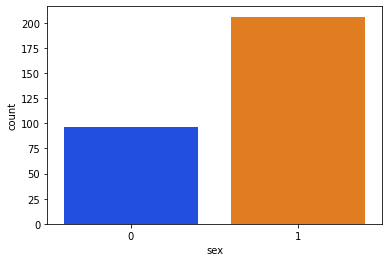

In [11]:
sns.countplot(data=df_heart, x="sex", palette='bright')
plt.show()



# Il y a 4 cp (chest pain) différentes

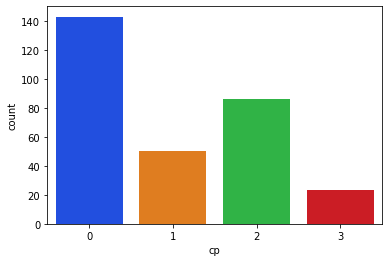

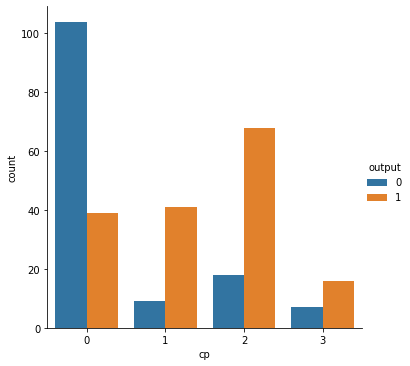

In [43]:
sns.countplot(data=df_heart, x="cp", palette='bright')
plt.show()


sns.catplot(x="cp", data=df_heart, kind="count", hue="output")

In [45]:
category_values(df_heart.cp, 1)

[([-1, 0], 0), ([0, 1], 143), ([1, 2], 50), ([2, 3], 86), ([3, 4], 23)]

# L'âge va de 29 ans à 77 ans


In [13]:
min(df_heart['age'])

29

In [14]:
max(df_heart['age'])

77

<AxesSubplot:>

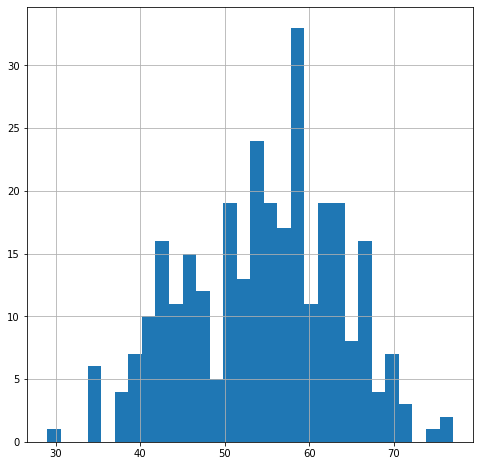

In [15]:

df_heart.age.hist(figsize=(8,8), bins=30)

# Création de catégorie avec choix du pas pour la réutiliser sur les autres colonnes

In [16]:
def category_values(df_heart, step):
    m1=round(df_heart.max()/step)*step
    m2=round(df_heart.min()/step)*step
    L=[i for i in range(m2,m1+(2*step),step)]
    dicts={}
    M=[]
    for a in range(len(L)):
        dicts[L[a]]=0
    for j in df_heart:
        for k in L:
            if j<k:
                dicts[k]+=1
                break
    for b in dicts:
        M.append(([b-step,b],dicts[b]))
    return M



In [17]:
category_values(df_heart.age, 5)

[([25, 30], 1),
 ([30, 35], 2),
 ([35, 40], 12),
 ([40, 45], 40),
 ([45, 50], 32),
 ([50, 55], 56),
 ([55, 60], 69),
 ([60, 65], 49),
 ([65, 70], 31),
 ([70, 75], 8),
 ([75, 80], 2)]

# Observation du fait que les 3 premières catégories ont très peu de personne

In [19]:
s=0
for i in df_heart.age:
    if 40<= i <= 70:
        s+=1
m=len(df_heart.age)
print(100*s/m)

93.04635761589404


#  On peut préciser que 93% du dataset est représenté par les gens ayant entre 40 et 70 ans

# Taux de chol

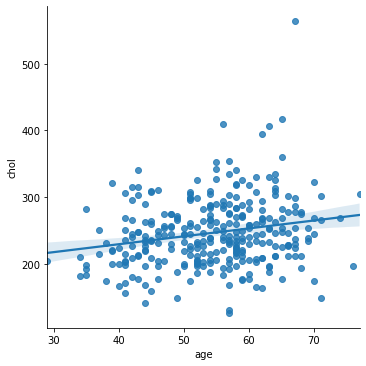

<AxesSubplot:>

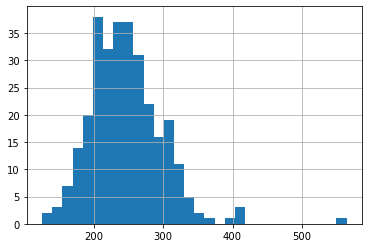

In [54]:
sns.lmplot("age", "chol", data = df_heart)
plt.show()

df_heart.chol.hist( bins=30)

In [21]:
max(df_heart['chol'])

564

# On réutilise la fonction de catégorie avec un plus grand pas vu les valeurs 

In [22]:
category_values(df_heart.chol,20)

[([100, 120], 0),
 ([120, 140], 2),
 ([140, 160], 4),
 ([160, 180], 16),
 ([180, 200], 27),
 ([200, 220], 46),
 ([220, 240], 52),
 ([240, 260], 47),
 ([260, 280], 38),
 ([280, 300], 26),
 ([300, 320], 23),
 ([320, 340], 10),
 ([340, 360], 5),
 ([360, 380], 1),
 ([380, 400], 1),
 ([400, 420], 3),
 ([420, 440], 0),
 ([440, 460], 0),
 ([460, 480], 0),
 ([480, 500], 0),
 ([500, 520], 0),
 ([520, 540], 0),
 ([540, 560], 0),
 ([560, 580], 1)]

# On observe une très faible quantité de personne en dessous de 180 et au dessus de 340

In [23]:
a=0
for i,j in category_values(df_heart.chol,20):
    if i[0]>=180 and i[1]<=340:
        a+=j
print((a/len(df_heart.chol))*100,"%")

89.0728476821192 %


# Il y a en effet 89% du dataset entre 180 et 340

# trtbps ( pression sanguine)



<AxesSubplot:>

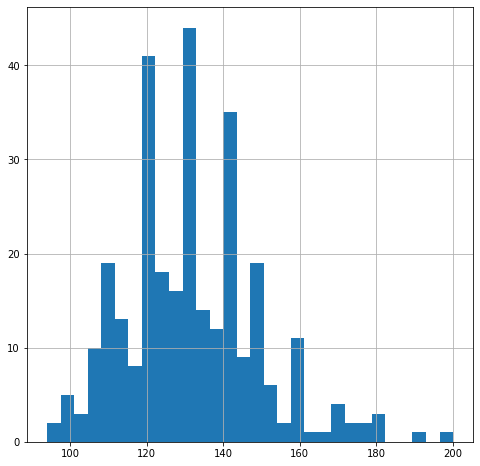

In [24]:
df_heart.trtbps.hist(figsize=(8,8), bins=30)

In [25]:
category_values(df_heart.trtbps,10)

[([80, 90], 0),
 ([90, 100], 2),
 ([100, 110], 18),
 ([110, 120], 40),
 ([120, 130], 75),
 ([130, 140], 70),
 ([140, 150], 46),
 ([150, 160], 25),
 ([160, 170], 13),
 ([170, 180], 8),
 ([180, 190], 3),
 ([190, 200], 1),
 ([200, 210], 1)]

In [26]:
z=0
for i in df_heart.trtbps:
    if 100 <= i <=170:
        z+=1
m=len(df_heart.trtbps)
print(100*z/m, "%")

96.35761589403974 %


#  96.35% du dataset avec une pression sanguine entre 100 et 170

#  fbs  (1 = true; 0 = false)

<AxesSubplot:>

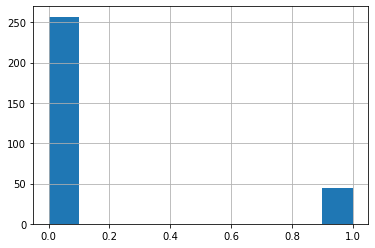

In [27]:
df_heart.fbs.hist()

# Resting electrocardiographic results


<AxesSubplot:>

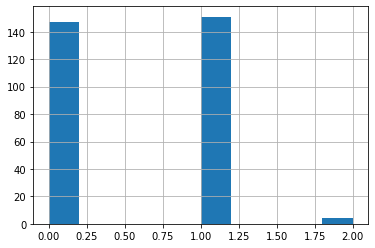

In [28]:
df_heart.restecg.hist()

In [29]:
df_heart.restecg.value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

# La valeur 0 étant pour les résultats normaux,
# La valeur 1 étant pour les résultats anormaux (trop haut ou trop bas)
# La valeur 2 étant pour les personnes avec des hypertrophies du ventricule gauche 



In [30]:
###################

# thalach : battement de coeur atteint max


<AxesSubplot:>

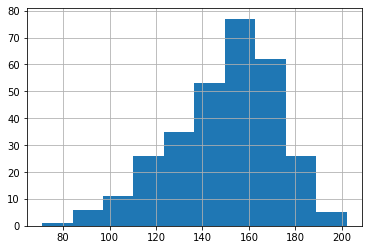

In [31]:
df_heart.thalachh.hist()

In [32]:
category_values(df_heart.thalachh,20)

[([60, 80], 1),
 ([80, 100], 7),
 ([100, 120], 26),
 ([120, 140], 51),
 ([140, 160], 99),
 ([160, 180], 98),
 ([180, 200], 19),
 ([200, 220], 1)]

In [33]:
z=0
for i in df_heart.thalachh:
    if 100 <= i <=180:
        z+=1
m=len(df_heart.thalachh)
print(100*z/m, "%")

91.3907284768212 %


# 91% du dataset concerne les personnes avec un battement cardiaque max situé entre 100 et 180

# exng : Angine due à l'effort


<AxesSubplot:>

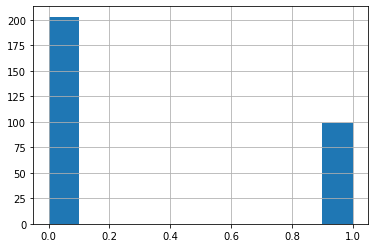

In [34]:
df_heart.exng.hist()

In [35]:
df_heart.thalachh.count()

302

# Seulement 1/3 des personnes ayant eu de l'angine à l'effort ont eu une crise cardiaque 

# Recherche de corélation entre les colonnes du dataset

<function matplotlib.pyplot.show(close=None, block=None)>

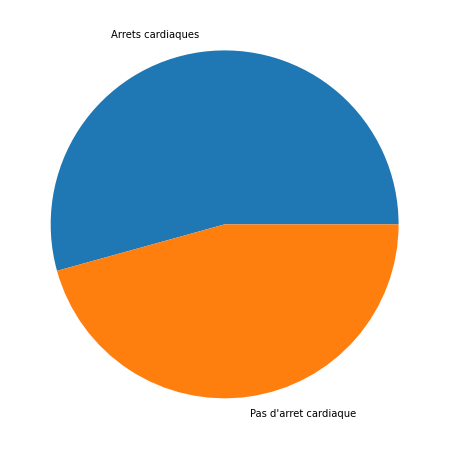

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(df_heart["output"].value_counts(), labels=["Arrets cardiaques", "Pas d'arret cardiaque"])
plt.show

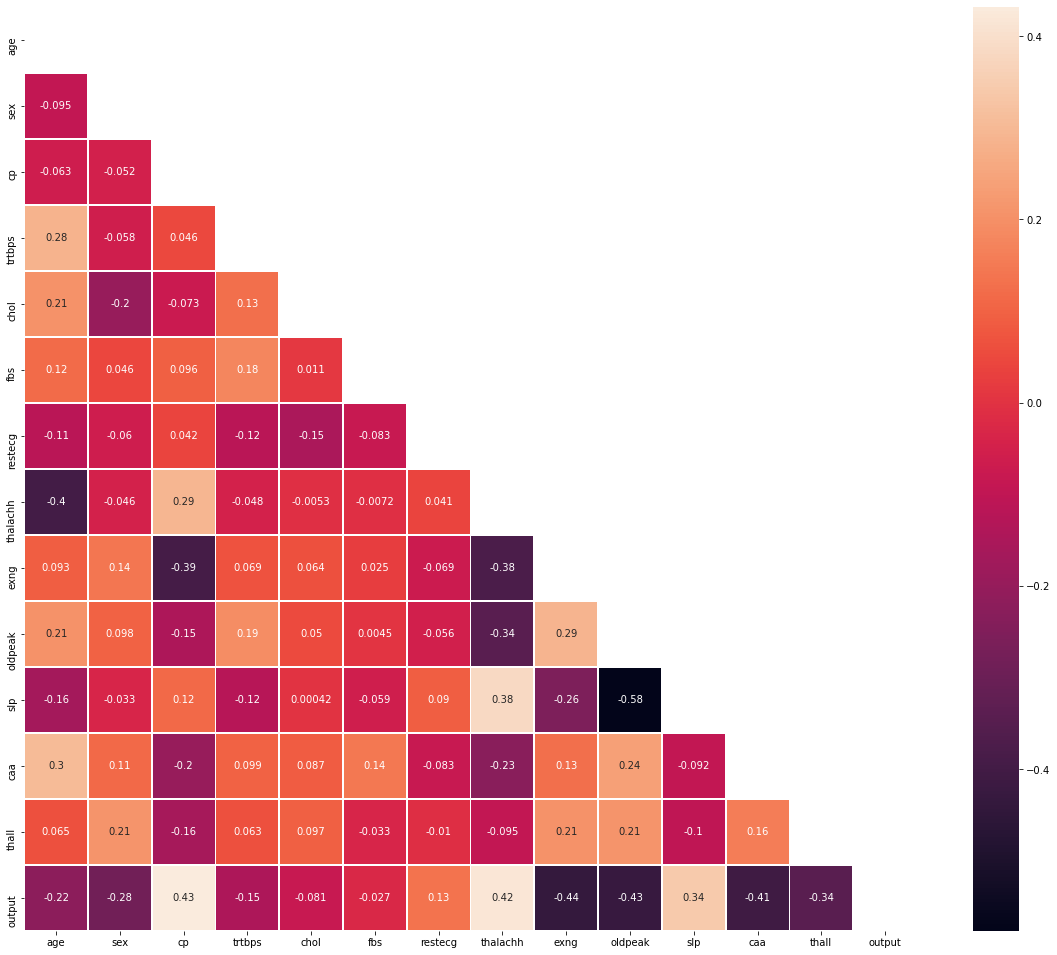

In [37]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df_heart.corr())
sns.heatmap(df_heart.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="rocket");

# ###### Pour résumer:   #########


# Le plus souvent entre 40 et 70 ans
# Taux de cholésterol entre 180 et 340
# Pression sanguine entre 100 et 170
# La CP la plus ressentie est la 0

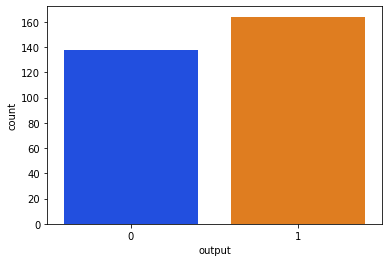

In [38]:
sns.countplot(data=df_heart, x="output", palette='bright')
plt.show()

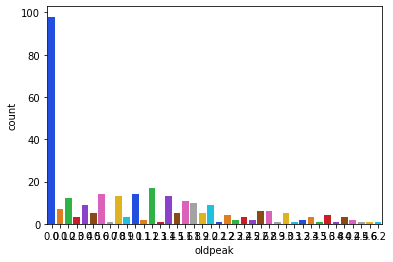

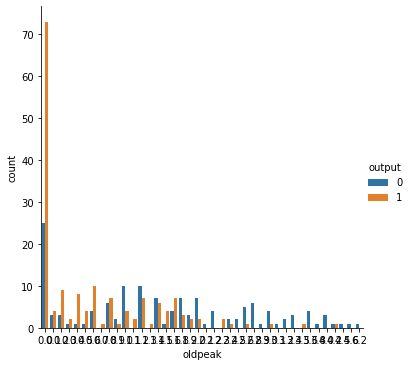

In [39]:
sns.countplot(data=df_heart, x="oldpeak", palette='bright')
plt.show()

sns.catplot(x="oldpeak", data=df_heart, kind="count", hue="output")

In [40]:
category_values(df_heart.oldpeak, 1)

[([-1, 0], 0),
 ([0, 1], 165),
 ([1, 2], 78),
 ([2, 3], 34),
 ([3, 4], 17),
 ([4, 5], 6),
 ([5, 6], 1),
 ([6, 7], 1)]

In [41]:
z=0
for i in df_heart.oldpeak:
    if 0 <= i <=3:
        z+=1
m=len(df_heart.oldpeak)
print(100*z/m, "%")

93.37748344370861 %
